This dataset collects data from 100 individuals who report their external stressors and how it might affect their well-being. This dataset encompassses a range of academic, social and demographic factors. Let's see what kind of insights and observations we can make from these data. 

dataset source: https://www.kaggle.com/datasets/fanishpandey/student-mental-stresssms

### import libraries

In [1]:
import pandas as pd
import csv
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

### import dataset as *csv*

In [69]:
dataset = []

with open ('data/student_mental_stress_dataset.csv', newline='') as f:
    reader=csv.reader(f)
    for row in reader:
        dataset.append(row)

dataset = dataset[1:]
print(dataset[:1])

[['101', '19', 'M', '3', 'Medium', 'Reserved', 'Not Placed', '4', '4', '2', '5', '3', '14', 'Family', '1', 'Academic Counseling', 'Socializing', '0', '2.8', '39540']]


### import dataset as *pandas*

In [2]:
df = pd.read_csv('data/student_mental_stress_dataset.csv')

df.head()

,Student_ID,Age,Gender,Year_of_Study,Family_Support,Student_Behavior,Placement_Status,Sleep_Hours,Academic_Stress_Level,Financial_Stress_Level,Family_Stress_Level,Emotional_Stress_Level,Total_Stress_Level,Main_Stress_Source,Counseling_Need,Proposed_Remedy,Coping_Mechanisms_Used,Risky_Behaviors_Engaged,CGPA,Parental_Income
0,101,19,M,3,Medium,Reserved,Not Placed,4,4,2,5,3,14,Family,1,Academic Counseling,Socializing,0,2.80,39540
1,102,23,F,4,Low,Reactive,Not Eligible,6,3,2,6,5,16,Family,0,Financial Aid Consultation,Socializing,0,2.35,21331
2,103,19,F,3,High,Reserved,Placed,4,6,9,4,2,21,Financial,0,Academic Counseling,Journaling,1,3.23,48483
3,104,21,M,2,Medium,Aggressive,Not Eligible,4,10,2,8,1,21,Academic,0,Emotional Support Workshop,Reading,0,3.35,37263
4,105,20,M,3,Low,Aggressive,Not Placed,5,6,7,10,1,24,Family,1,Financial Aid Consultation,Socializing,1,3.96,51514


### sanity check

In [6]:
df.shape

(100, 20)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Student_ID               100 non-null    int64  
 1   Age                      100 non-null    int64  
 2   Gender                   100 non-null    object 
 3   Year_of_Study            100 non-null    int64  
 4   Family_Support           100 non-null    object 
 5   Student_Behavior         100 non-null    object 
 6   Placement_Status         100 non-null    object 
 7   Sleep_Hours              100 non-null    int64  
 8   Academic_Stress_Level    100 non-null    int64  
 9   Financial_Stress_Level   100 non-null    int64  
 10  Family_Stress_Level      100 non-null    int64  
 11  Emotional_Stress_Level   100 non-null    int64  
 12  Total_Stress_Level       100 non-null    int64  
 13  Main_Stress_Source       100 non-null    object 
 14  Counseling_Need          10

In [10]:
df.isnull().any()

Student_ID                 False
Age                        False
Gender                     False
Year_of_Study              False
Family_Support             False
Student_Behavior           False
Placement_Status           False
Sleep_Hours                False
Academic_Stress_Level      False
Financial_Stress_Level     False
Family_Stress_Level        False
Emotional_Stress_Level     False
Total_Stress_Level         False
Main_Stress_Source         False
Counseling_Need            False
Proposed_Remedy            False
Coping_Mechanisms_Used     False
Risky_Behaviors_Engaged    False
CGPA                       False
Parental_Income            False
dtype: bool

### Demographic Analysis

In [44]:
# Age Distribution
age_stats = df['Age'].agg(['count','mean','min','max','std'])
print("Age Stats:")
print(age_stats)

age_stats_ranking = df['Age'].value_counts()
age_stats_ranking = age_stats_ranking.sort_index()
print("\nAge Distribution:")
print(age_stats_ranking)

# Gender Distribution
gender_stats = df['Gender'].value_counts()
print("\nGender Distribution:")
print(gender_stats)

# Year of Study Distribution
year_of_study_stats = df['Year_of_Study'].value_counts()
sorted_year_of_study_stats = year_of_study_stats.sort_index()
print("\nYear of Study Distribution:")
print(sorted_year_of_study_stats)

Age Stats:
count    100.000000
mean      21.200000
min       18.000000
max       24.000000
std        1.912215
Name: Age, dtype: float64

Age Distribution:
Age
18     5
19    18
20    19
21    18
22    10
23    10
24    20
Name: count, dtype: int64

Gender Distribution:
Gender
M    55
F    45
Name: count, dtype: int64

Year of Study Distribution:
Year_of_Study
1    26
2    30
3    25
4    19
Name: count, dtype: int64


### Lifestyle Analysis

In [40]:
# Student Behaviour Distribution
student_behavior_stats = df['Student_Behavior'].value_counts()
print("Student Behaviour Distribution:")
print(student_behavior_stats)

# Placement Distribution Distribution
placement_stats = df['Placement_Status'].value_counts()
print("\nPlacement Status:")
print(placement_stats)

# Sleep Hours Distribution
sleep_hours_stats = df['Sleep_Hours'].agg(['count','mean','min','max','std'])
print("\nSleep Hours Stats:")
print(sleep_hours_stats)

# Received Family Support Distribution
family_support_distribution = df['Family_Support'].value_counts()
print("\nRecieved Family Support Distribution:")
print(family_support_distribution)

Student Behaviour Distribution:
Student_Behavior
Reactive      30
Aggressive    26
Reserved      22
Positive      22
Name: count, dtype: int64

Placement Status:
Placement_Status
Placed          40
Not Eligible    32
Not Placed      28
Name: count, dtype: int64

Sleep Hours Stats:
count    100.000000
mean       5.920000
min        4.000000
max        8.000000
std        1.454217
Name: Sleep_Hours, dtype: float64

Recieved Family Support Distribution:
Family_Support
Low       41
High      32
Medium    27
Name: count, dtype: int64


### Stress Levels Analysis - Academic Stress

In [39]:
# Academic Stress Level
academic_stress_stats_ranking = df['Academic_Stress_Level'].value_counts()
academic_stress_stats_ranking = academic_stress_stats_ranking.sort_index()
print("Reported Academic Stress Levels:")
print(academic_stress_stats_ranking)

academic_stress_stats = df['Academic_Stress_Level'].agg(['count','mean','min','max','std'])
print("\nAcademic Stress Levels Stats:")
print(academic_stress_stats)

Reported Academic Stress Levels:
Academic_Stress_Level
1     13
2      6
3      8
4     11
5      9
6     18
7     10
8      8
9      7
10    10
Name: count, dtype: int64

Academic Stress Levels Stats:
count    100.000000
mean       5.430000
min        1.000000
max       10.000000
std        2.804236
Name: Academic_Stress_Level, dtype: float64


### Stress Levels Analysis - Financial Stress

In [38]:
# Financial Stress Level
financial_stress_stats_ranking = df['Financial_Stress_Level'].value_counts()
financial_stress_stats_ranking = financial_stress_stats_ranking.sort_index()
print("Reported Financial Stress Levels:")
print(financial_stress_stats_ranking)

financial_stress_stats = df['Financial_Stress_Level'].agg(['count','mean','min','max','std'])
print("\nFinancial Stress Levels Stats:")
print(financial_stress_stats)

Reported Financial Stress Levels:
Financial_Stress_Level
1     10
2     16
3      7
4     10
5      7
6     10
7     13
8      8
9     13
10     6
Name: count, dtype: int64

Financial Stress Levels Stats:
count    100.000000
mean       5.300000
min        1.000000
max       10.000000
std        2.886751
Name: Financial_Stress_Level, dtype: float64


### Stress Levels Analysis - Family Stress

In [37]:
# Family Stress Level
family_stress_stats_ranking = df['Family_Stress_Level'].value_counts()
family_stress_stats_ranking = family_stress_stats_ranking.sort_index()
print("Reported Family Stress Levels:")
print(family_stress_stats_ranking)

family_stress_stats = df['Family_Stress_Level'].agg(['count','mean','min','max','std'])
print("\nFamily Stress Levels Stats:")
print(family_stress_stats)

Reported Family Stress Levels:
Family_Stress_Level
1     12
2      9
3      8
4      8
5     13
6     13
7     11
8     10
9      8
10     8
Name: count, dtype: int64

Family Stress Levels Stats:
count    100.000000
mean       5.380000
min        1.000000
max       10.000000
std        2.795306
Name: Family_Stress_Level, dtype: float64


### Stress Levels Analysis - Emotional Stress

In [46]:
# Emotional Stress Level
emotional_stress_stats_ranking = df['Emotional_Stress_Level'].value_counts()
emotional_stress_stats_ranking = emotional_stress_stats_ranking.sort_index()
print("Reported Emotional Stress Levels:")
print(emotional_stress_stats_ranking)

emotional_stress_stats = df['Emotional_Stress_Level'].agg(['count','mean','min','max','std'])
print("\nEmotional Stress Levels Stats:")
print(emotional_stress_stats)

Reported Emotional Stress Levels:
Emotional_Stress_Level
1     15
2     14
3      7
4     13
5     10
6      7
7      8
8     12
9      7
10     7
Name: count, dtype: int64

Emotional Stress Levels Stats:
count    100.00000
mean       4.93000
min        1.00000
max       10.00000
std        2.91376
Name: Emotional_Stress_Level, dtype: float64


### Stress Levels Analysis - Total Stress

In [48]:
# Total Stress Level
total_stress_stats_ranking = df['Total_Stress_Level'].value_counts()
total_stress_stats_ranking = total_stress_stats_ranking.sort_index()
print("Reported Total Stress Levels:")
print(total_stress_stats_ranking)

family_stress_stats = df['Total_Stress_Level'].agg(['count','mean','min','max','std'])
print("\nTotal Stress Levels Stats:")
print(_stress_stats)

Reported Total Stress Levels:
Total_Stress_Level
10     1
11     2
12     4
13     4
14     4
15     1
16     8
17     1
18    10
19     6
20     7
21     9
22     5
23     5
24     7
25     6
26     4
27     4
28     3
29     2
30     1
31     1
33     1
34     1
35     1
36     1
37     1
Name: count, dtype: int64

Total Stress Levels Stats:
count    100.000000
mean      21.040000
min       10.000000
max       37.000000
std        5.811726
Name: Total_Stress_Level, dtype: float64


### Data Visualisation

#### Participation:

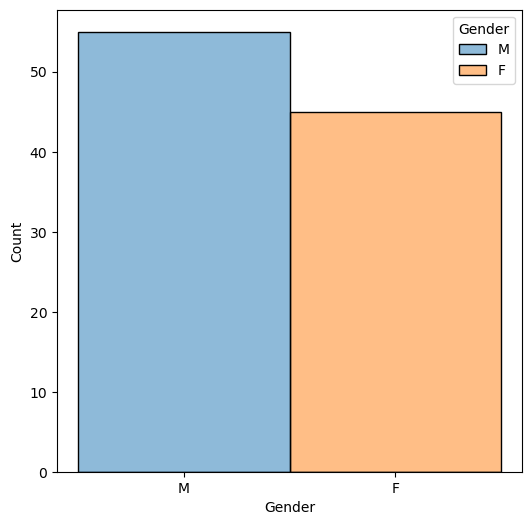

In [60]:
plt.figure(figsize=(6, 6))
sns.histplot(data=df,x='Gender', hue='Gender')
plt.show()

#### Year of Study:

([<matplotlib.axis.XTick at 0x26799ccca10>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

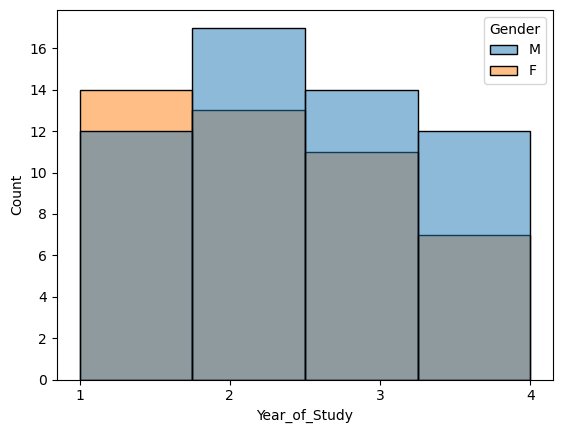

In [104]:
sns.histplot(data=df, x='Year_of_Study', hue='Gender',bins=4)
plt.xticks(ticks=range(1, 5), labels=range(1, 5))

#### Reported Main Stress Source

<Axes: xlabel='Main_Stress_Source', ylabel='Count'>

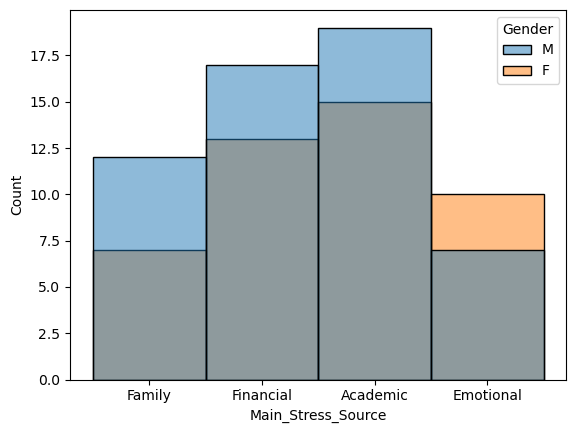

In [103]:
sns.histplot(data=df, x='Main_Stress_Source', hue='Gender')

#### Stress Level: Academic

<Axes: xlabel='Academic_Stress_Level', ylabel='Count'>

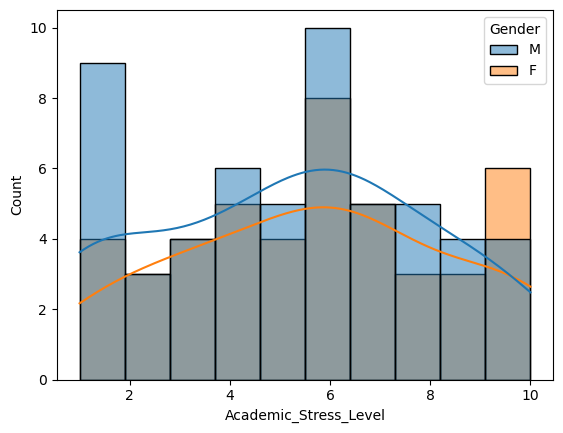

In [78]:
sns.histplot(data=df, x='Academic_Stress_Level', hue='Gender',bins=10, kde=True)

#### Stress Level: Financial

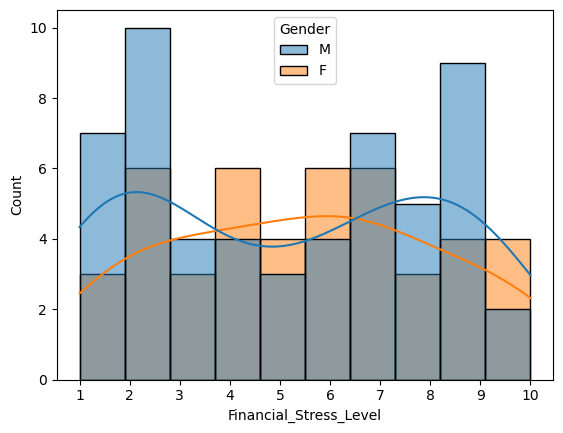

In [115]:
sns.histplot(data=df, x='Financial_Stress_Level',hue='Gender', bins=10,kde=True)
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.show()

#### Stress Level: Family

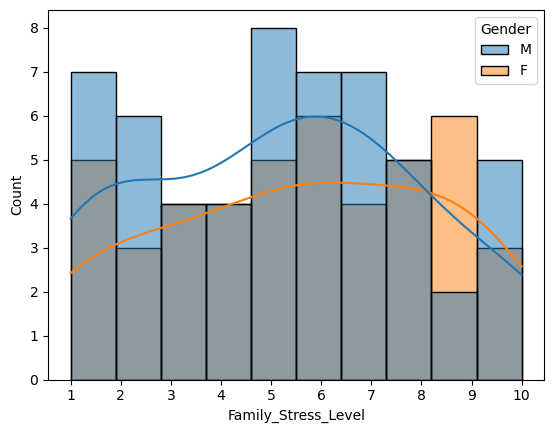

In [114]:
sns.histplot(data=df, x='Family_Stress_Level', bins=10, hue='Gender', kde=True)
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.show()

#### Stress Level: Emotional

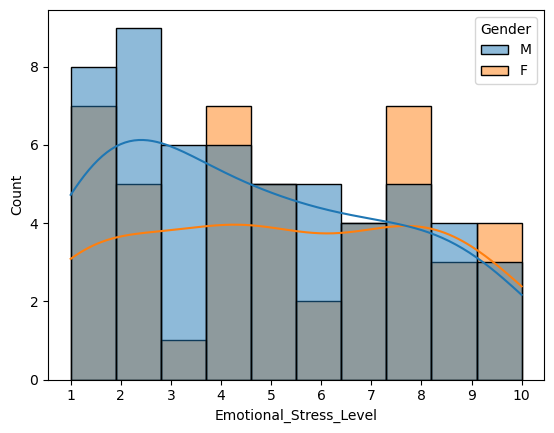

In [113]:
sns.histplot(data=df, x='Emotional_Stress_Level', bins=10, hue='Gender', kde=True)
plt.xticks(ticks=range(1, 11), labels=range(1, 11))
plt.show()

#### Total Stress Level Reported

<Axes: xlabel='Total_Stress_Level', ylabel='Count'>

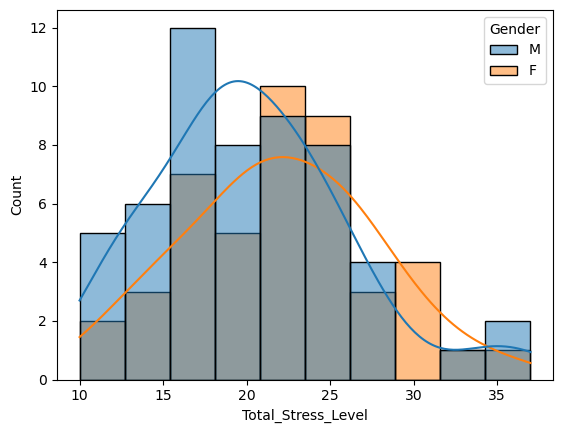

In [117]:
sns.histplot(data=df, x='Total_Stress_Level', bins=10, hue='Gender', kde=True)

#### Coping Mechanisms Used

<Axes: xlabel='Coping_Mechanisms_Used', ylabel='Count'>

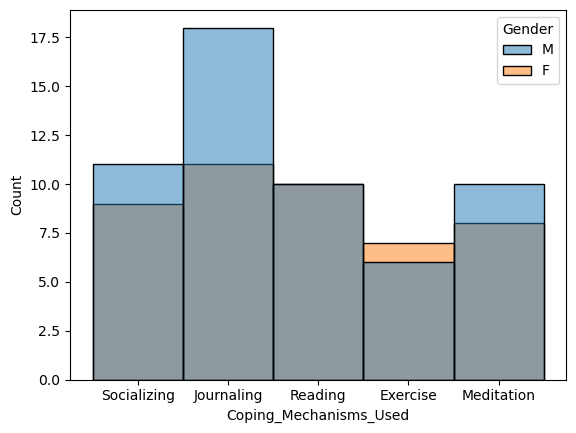

In [126]:
sns.histplot(data=df, x='Coping_Mechanisms_Used',hue='Gender')

#### Proposed Remedy

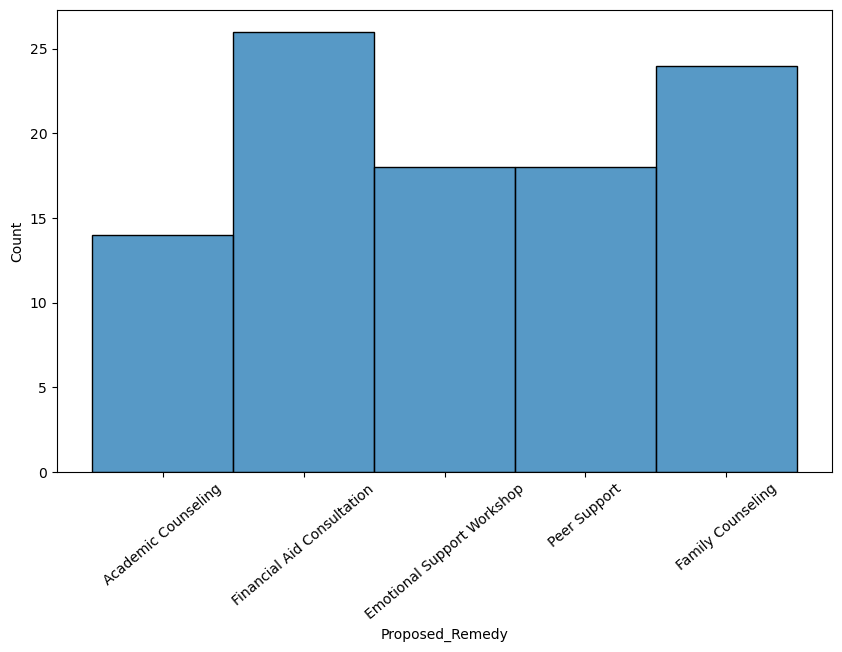

In [118]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Proposed_Remedy')
plt.xticks(rotation=40)
plt.show()

<Axes: xlabel='CGPA', ylabel='Total_Stress_Level'>

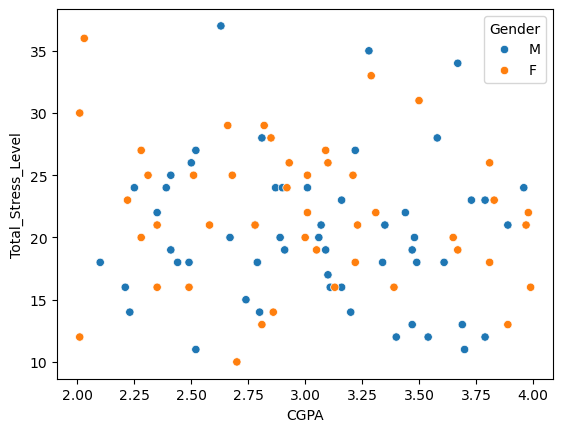

In [137]:
sns.scatterplot(data=df, y='Total_Stress_Level', x='CGPA',hue='Gender')

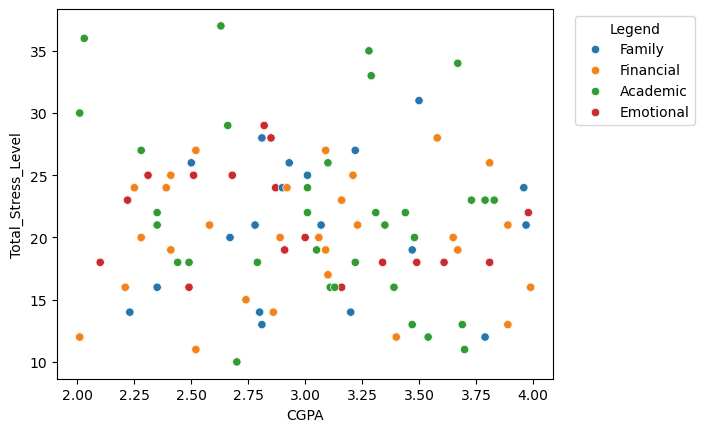

In [135]:
sns.scatterplot(data=df, y='Total_Stress_Level', x='CGPA',hue='Main_Stress_Source')

plt.legend(
    loc='upper right',
    bbox_to_anchor=(1.3,1),
    title='Legend'
)
plt.show()